# Neural Networks

## Neural networks using MLPClassifier from sklearn.neural_network module

### Classifying (Recognizing) Hand-written Digits using neural networks

### Objectives

On completing this assignment, students will be able to write a simple AI application for classifying (Recognizing) hand-written digits using neural networks.

### Readings for Neural Networks

#### Required Reading: Introduction

https://www.ibm.com/topics/neural-networks#:~:text=One%20of%20the%20best%2Dknown,heart%20of%20deep%20learning%20models.

#### Optional Reading: Backpropagation

https://www.geeksforgeeks.org/backpropagation-in-neural-network

#### Required Reading: Code Example

https://www.pluralsight.com/resources/blog/guides/machine-learning-neural-networks-scikit-learn#:~:text=In%20this%20guide%2C%20you%20have,training%20and%20test%20data%2C%20respectivetiv

### Additionally do the following

For training and testing the application, we use MLPClassifier classifier from sklearn.neural_network module as shown in the code fragment below. 

    from sklearn.neural_network import MLPClassifier

    clf=MLPClassifier(hidden_layer_sizes=(64, 10), max_iter=200, learning_rate_init=0.05, verbose=1, random_state=1)
    
The above MLPClassifier classifier will employs neural networks during training. In neural networks, the input layer size is always the same as the number of inputs and the output layer size is always the same as the number of outputs. 

In this case, since each digit is represented by 64 (8 by 8) pixel values, the input layer size will be 64. Since digits are to be classified into 10 different numerals from 0 to 9, the output layer size will be 10.

We chose, two hidden layers as indicated in the code fragment above (64,10). We chose the first hidden layer size to be 64 (the same as the input layer size) and the second hidden layer size to be 10 (the same as the output layer size). 

We chose maximum iteration to be 200 as shown in code fragment above. So, during training, the classifier (clf) will run the same data 200 times. It will randomly select its internal weight parameter values at the beginning the of first run and then adjust these values at the end of each run in an attempt to reduce the loss (error) (the difference between the actual output values and the true values) for the next run. 

We chose learning rate to be 0.05 in the code fragment above. So, the classifier will multiply the loss value with 0.05 to decide on how much to try to reduce the loss for the next run. With a smaller learning rate (such as 0.01), it will try to reduce loss by smaller amount and for a larger learning rate (such as 0.1), it will try to reduce the loss by a smaller amount at each run in an attempt to get a loss approaching zero.

We chose verbose to be 1 (or True) in the above code fragment in order to initiate printing of details such as the loss value after each run.

We chose to specify the value for random_state in the above code fragment, to ensure that the classifier would start from the same random state at each execution of the application and its behavior will be consistent at each run of the application. This will allow us to experiment with different parameter values while keeping the classifier behavior consistent.

#### Experiments
   
You are to do the following three experiments:

__Experiment 1__

Keep the following values fixed

    max_iter = 200
    learning_rate_init = 0.05

Change the hidden layer sizes as below and record the corresponding accuracy score:

    hidden_layer_sizes = (50,10)    accuracy score =
    hidden_layer_sizes = (100,10)   accuracy score =
    hidden_layer_sizes = (200,10)   accuracy score = 

__Experiment 2__

Keep the following values fixed

    max_iter = 200
    hidden_layer_size = (100,10)

Change the learning rate as below and record the corresponding accuracy score:

    learning_rate_init = 0.01   accuracy score =
    learning_rate_init = 0.05   accuracy score =
    learning_rate_init = 0.1    accuracy score = 

__Experiment 3__

Keep the following values fixed

    hidden_layer_sizes = (100,10)
    learning_rate_init = 0.05

Change the max_iter as below and record the corresponding accuracy score:

    max_iter = 50    accuracy score = 
    max_iter = 100   accuracy score = 
    max_iter = 200   accuracy score =

__Summary Report__

Write a short paragraph summarizing the above results and what you learn about AI from the above experiment.


## Title: Artificial Neural Network (ANN) Digit Classification

### Keith Yrisarri Stateson
July 18, 2024. Python 3.11.0

##### Summary
The assignment focuses on building an Artificial Neural Network (ANN) to classify handwritten digits from the MNIST dataset. The objective is to train a Artificial Neural Network (ANN) model to recognize and classify images of digits (0-9). This is achieved by using the MLPClassifier by scikit-learn. MLP means multi-layer perceptron, a type of artificial neural network designed for supervised learning tasks, particularly classification.

Common Parameters:
- hidden_layer_sizes: Tuple indicating the number of neurons in each hidden layer (e.g., (100,) for one hidden layer with 100 neurons).
- activation: Activation function for the hidden layers (default is 'relu').
- solver: The optimizer for weight optimization (default is 'adam').
- learning_rate_init: Initial learning rate used (default is 0.001).
- max_iter: Maximum number of iterations for training (default is 200).
- verbose: Controls the verbosity of the output during training.

Assumptions: None.

##### Table of Contents
Data Preprocessing
- Loading the MNIST dataset
- Normalizing the data
- Reshaping the data for the neural network

Building the ANN Model
- Model architecture

Training the Model
- Training process
- Monitoring training performance
- Handling overfitting

Evaluating the Model
- Model evaluation metrics
- Accuracy and loss visualization
- Confusion matrix analysis

Experiments
- Adjust hyperparameters

Conclusion
- Summary of findings

##### Questions
- How do Make Predictions?
    - Using the trained model for predictions
    - Visualizing predictions

## Data Preprocessing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

digits=datasets.load_digits()
dir (digits)  # to see the attributes of the dataset and the target

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

from digit data set extract data, images, and target

In [2]:
data = digits.data
images = digits.images
target = digits.target  # the target is the number that the image represents
print (type (data))
print (type (images))
print (type (target))
print (data.shape)
print (images.shape)
print (target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1797, 64)
(1797, 8, 8)
(1797,)


Display first element of data, images, and target arrays and show the first element of images as plot

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


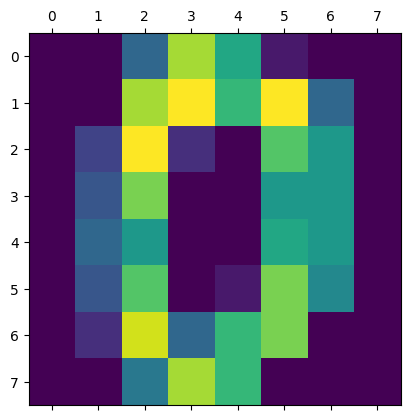

In [7]:
import matplotlib.pyplot as plt
print (data[0])
print (images[0])
print (target[0])
plt.matshow(images[0])  # to display the first image
# plt.imshow(images[0], cmap=plt.cm.gray_r, interpolation="nearest")

So, from the above, it is clear that the elements of data, images, and target arrays carry data about images in different form and each element of the arrays contains data about one image as indicated below:

- An element of data array contains 64 pixel values in one dimension array 
- An element of images array contains the same pixel values as an 8 by 8 two dimensional array (So, we were able to show it in image form using  plt)
- An element of target contains the information about the image as an int

We will leave images array as it is and simply use it for displaying images.

We will use data array for processing. Since, the pixel values vary form 0 (black) to 255 (black), we will normalize them (bring them in the range from 0 to 1) by dividing each by 255. Since, it is a numpy array, we can divide each value in the whole array in a single step and store it in a variable data_flat_norm (the name indicates that the array elements are one dimensional (or flat) and they are normalized).

In [8]:
data_flat_norm = data/255
data_flat_norm[0:3]

array([[0.        , 0.        , 0.01960784, 0.05098039, 0.03529412,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.05098039, 0.05882353, 0.03921569, 0.05882353, 0.01960784,
        0.        , 0.        , 0.01176471, 0.05882353, 0.00784314,
        0.        , 0.04313725, 0.03137255, 0.        , 0.        ,
        0.01568627, 0.04705882, 0.        , 0.        , 0.03137255,
        0.03137255, 0.        , 0.        , 0.01960784, 0.03137255,
        0.        , 0.        , 0.03529412, 0.03137255, 0.        ,
        0.        , 0.01568627, 0.04313725, 0.        , 0.00392157,
        0.04705882, 0.02745098, 0.        , 0.        , 0.00784314,
        0.05490196, 0.01960784, 0.03921569, 0.04705882, 0.        ,
        0.        , 0.        , 0.        , 0.02352941, 0.05098039,
        0.03921569, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.04705882, 0.05098039,
        0.01960784, 0.        , 0.        , 0.        , 0. 

Split the data in data_flat_norm into training data and test data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(data_flat_norm, target, test_size=0.2, random_state=0)

print (X_train[0])

[0.         0.         0.         0.03529412 0.05882353 0.00784314
 0.         0.         0.         0.         0.01960784 0.0627451
 0.04313725 0.00392157 0.         0.         0.         0.
 0.05098039 0.05882353 0.00392157 0.         0.         0.
 0.         0.00784314 0.0627451  0.04313725 0.         0.
 0.         0.         0.         0.00784314 0.0627451  0.04313725
 0.01568627 0.01568627 0.         0.         0.         0.00784314
 0.05882353 0.0627451  0.0627451  0.05490196 0.03921569 0.00392157
 0.         0.         0.03529412 0.0627451  0.02745098 0.01176471
 0.05882353 0.02352941 0.         0.         0.         0.02745098
 0.05882353 0.0627451  0.0627451  0.02352941]


Create MLPClassifier classifier for neural network training and set its parameters as below.

- hidden_layer_sizes is used to indicate the number of hidden layers and the number of computing units in each hidden layer
- max_iter is used to indicate the number of times to do the training with the same test data, each time changing the internal weight parameter values in the direction of reducing the loss.
- verbose A value of True or 1 request that the details such as loss values be displayed after each run. 
-random_state By specifying the same random_state value each time you run the classifier, you are ensuring that the same sequence of events will occur each time. This can be helpful in debugging.

## Build the ANN Model

In [13]:
# Build Artificial Neural Network (ANN) model

from sklearn.neural_network import MLPClassifier

clf=MLPClassifier(hidden_layer_sizes=(64, 10), max_iter=200, learning_rate_init=0.05, verbose=1, random_state=1)

Start the training

## Train the Model

In [14]:
clf.fit (X_train,y_train)

Iteration 1, loss = 2.30421014
Iteration 2, loss = 2.10670810
Iteration 3, loss = 1.84612755
Iteration 4, loss = 1.47339401
Iteration 5, loss = 1.10939035
Iteration 6, loss = 0.93026683
Iteration 7, loss = 0.93243884
Iteration 8, loss = 0.81634669
Iteration 9, loss = 0.75415133
Iteration 10, loss = 0.68509135
Iteration 11, loss = 0.67650182
Iteration 12, loss = 0.61864945
Iteration 13, loss = 0.60401945
Iteration 14, loss = 0.58176095
Iteration 15, loss = 0.59163216
Iteration 16, loss = 0.51643214
Iteration 17, loss = 0.49754356
Iteration 18, loss = 0.47375272
Iteration 19, loss = 0.47018774
Iteration 20, loss = 0.47247387
Iteration 21, loss = 0.41392364
Iteration 22, loss = 0.41937124
Iteration 23, loss = 0.39347308
Iteration 24, loss = 0.36090958
Iteration 25, loss = 0.36226367
Iteration 26, loss = 0.39116833
Iteration 27, loss = 0.35710670
Iteration 28, loss = 0.36513030
Iteration 29, loss = 0.34982524
Iteration 30, loss = 0.35746274
Iteration 31, loss = 0.33690817
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64, 10), learning_rate_init=0.05,
              random_state=1, verbose=1)

Since, the loss (error) (the difference between the true and predicted value) may not be zero at the end of training, calculate the classifier's score with the training data. Also, calculate its score with the test data. 

In [15]:
# Scores range from 0 to 1, with a larger score indicating a better fit.
# The score is computed as the fraction of correctly classified samples.

# A difference between the training score and the test score is evidence of overfitting and can be reduced by decreasing the complexity of the model (e.g., the number of parameters) or by increasing the size of the training set.

print(clf.score(X_train,y_train))
print (clf.score(X_test,y_test))

0.9679888656924147
0.8888888888888888


## Evaluate the Model

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print (confusion_matrix (y_test,y_pred))

0.8888888888888888
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.84      0.91      0.88        35
           2       0.97      0.92      0.94        36
           3       0.90      0.90      0.90        29
           4       0.88      1.00      0.94        30
           5       0.97      0.82      0.89        40
           6       0.98      0.98      0.98        44
           7       0.97      0.79      0.87        39
           8       0.68      0.87      0.76        39
           9       0.82      0.76      0.78        41

    accuracy                           0.89       360
   macro avg       0.90      0.90      0.89       360
weighted avg       0.90      0.89      0.89       360

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  1  0  2  0]
 [ 0  1 33  1  0  0  0  0  1  0]
 [ 0  0  1 26  0  0  0  0  2  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  1  6]
 [ 0  1  0  0  0  0 43  

## Experiment 1 - adjusting hidden_layer_sizes

In [36]:
# Assess accuracy of the model by adjusting the hidden_layer_sizes parameter

# The hidden_layer_sizes parameter is a tuple that specifies the number of hidden layers and the number of neurons in each layer.

# The verbose parameter in MLPClassifier controls the verbosity of the training process, meaning it determines whether the training progress is printed to the console. It does not affect the analysis or the performance of the model. It's purely for monitoring purposes.
    # verbose=True (verbose=1): Prints the training progress to the console, including iteration number and loss.
    # verbose=False (verbose=0): Suppresses the printing of training progress.
    # verbose=0 results in a warning.

import warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore", category=ConvergenceWarning) # when verbose=0

hidden_layer_sizes = [(50, 10), (64, 10), (100, 10), (200, 10)]

for hidden_layer_size in hidden_layer_sizes:
    clf=MLPClassifier(hidden_layer_sizes=hidden_layer_size, max_iter=200, learning_rate_init=0.05, verbose=0, random_state=1)
    
    clf.fit (X_train,y_train)
    print(f'Experiment with hidden layer sizes: {hidden_layer_size}')
    print(f'CLF Score on training set: {clf.score(X_train, y_train):.4f}')
    print(f'CLF Score on test set: {clf.score(X_test, y_test):.4f}')
    y_pred = clf.predict(X_test)
    print(f'Accuracy score: {accuracy_score(y_test, y_pred):.4f}')
    print('-'*50)

Experiment with hidden layer sizes: (50, 10)
CLF Score on training set: 0.9868
CLF Score on test set: 0.9278
Accuracy score: 0.9278
--------------------------------------------------
Experiment with hidden layer sizes: (64, 10)
CLF Score on training set: 0.9680
CLF Score on test set: 0.8889
Accuracy score: 0.8889
--------------------------------------------------
Experiment with hidden layer sizes: (100, 10)
CLF Score on training set: 1.0000
CLF Score on test set: 0.9417
Accuracy score: 0.9417
--------------------------------------------------
Experiment with hidden layer sizes: (200, 10)
CLF Score on training set: 0.9986
CLF Score on test set: 0.9389
Accuracy score: 0.9389
--------------------------------------------------


## Experiment 2 - adjusting learning_rate_init

In [37]:
learning_rate_init_list = [0.01, 0.05, 0.1]

for lri in learning_rate_init_list:
    clf=MLPClassifier(hidden_layer_sizes=(100, 10), max_iter=200, learning_rate_init=lri, verbose=0, random_state=1)
    
    clf.fit (X_train,y_train)
    print(f'Experiment with learning rate init: {lri}')
    print(f'CLF Score on training set: {clf.score(X_train, y_train):.4f}')
    print(f'CLF Score on test set: {clf.score(X_test, y_test):.4f}')
    y_pred = clf.predict(X_test)
    print(f'Accuracy score: {accuracy_score(y_test, y_pred):.4f}')
    print('-'*50)

Experiment with learning rate init: 0.01
CLF Score on training set: 0.9798
CLF Score on test set: 0.9250
Accuracy score: 0.9250
--------------------------------------------------
Experiment with learning rate init: 0.05
CLF Score on training set: 1.0000
CLF Score on test set: 0.9417
Accuracy score: 0.9417
--------------------------------------------------
Experiment with learning rate init: 0.1
CLF Score on training set: 0.8177
CLF Score on test set: 0.7667
Accuracy score: 0.7667
--------------------------------------------------


## Experiment 3 - adjusting max_iter

In [38]:
max_iter_list = [50, 100, 200]

for mi in max_iter_list:
    clf=MLPClassifier(hidden_layer_sizes=(100, 10), max_iter=mi, learning_rate_init=0.05, verbose=0, random_state=1)
    
    clf.fit (X_train,y_train)
    print(f'Experiment with max iter: {mi}')
    print(f'CLF Score on training set: {clf.score(X_train, y_train):.4f}')
    print(f'CLF Score on test set: {clf.score(X_test, y_test):.4f}')
    y_pred = clf.predict(X_test)
    print(f'Accuracy score: {accuracy_score(y_test, y_pred):.4f}')
    print('-'*50)

Experiment with max iter: 50
CLF Score on training set: 0.9896
CLF Score on test set: 0.9278
Accuracy score: 0.9278
--------------------------------------------------
Experiment with max iter: 100
CLF Score on training set: 1.0000
CLF Score on test set: 0.9444
Accuracy score: 0.9444
--------------------------------------------------
Experiment with max iter: 200
CLF Score on training set: 1.0000
CLF Score on test set: 0.9417
Accuracy score: 0.9417
--------------------------------------------------


## Conclusion

The MLPClassifier class from skikit-learn library was used to build a neural network model for image classificaion. The model performance was optimized by adjusting the hyperparameters e.g., the number of hidden layers, the learning rate, and the number of iterations. Other hyperparameters can also be modified e.g. the number of neurons in each layer and evaluating the model's performance e.g. overfitting.

Metrics were conducted to assess model accuracy, which performed well. Having learned to use the MLPClassifier classifier to train a neural network model on the MNIST dataset, which contained images of handwritten digits, the model can now be applied to recognize handwritten digits with a high degree of accuracy.

Best hyperparameter performers:
- Hidden layer sizes: 100, 10
- Learning rate: 0.05
- Max iter: 100

The MLPClassifier is a powerful tool for building nueral network models for image classification.